# Optimization: principles and algorithms

Bierlaire, M. (2015). *Optimization: Principles and Algorithms.* EPFL Press.<br>
The numbering of the algorithms, tables and page refer to the book.

## Chapter 10: Newton's local method

### Algorithm 10.1: Newton's local method

In [1]:
import numpy as np
from scipy import linalg
def newtonLocal(obj,x0,eps,maxiter=100):
    xk = x0
    (f,g,H) = obj(xk)
    iters = list()
    iters.append([xk,f,g,H])
    k = 0
    while linalg.norm(g) > eps and k < maxiter:
        d = linalg.solve(H,-g)
        xk = xk + d
        (f,g,H) = obj(xk)
        iters.append([xk,f,g,H])
        k += 1
    return (xk,iters)

Example 5.8: $f(x_1,x_2) = \frac{1}{2} x_1^2 + x_1 \cos(x_2)$

In [2]:
import math
def ex0508(x):
    f = 0.5 * x.item(0) * x.item(0) + x.item(0) * math.cos(x.item(1))
    g = np.array([[ x.item(0) + math.cos(x.item(1))],[ -x.item(0) * math.sin(x.item(1)) ] ])
    H = np.array([[ 1 , -math.sin(x.item(1))],[ -math.sin(x.item(1)),-x.item(0)*math.cos(x.item(1))]])
    return (f,g,H)
                                                      

In [3]:
x0 = np.array([[1],[1]])
(sol,iters) = newtonLocal(ex0508,x0,1e-15)
print(sol)

[[1.99048507e-17]
 [1.57079633e+00]]


Table 10.1, page 237

In [4]:
print("k\txk\t\tGrad(xk)\t\t||Grad(xk)||\t\tf(xk)")
for k in range(len(iters)):
    print("{}\t{:+E}\t{:+E}\t{:+E}\t{:+E}".format(k,iters[k][0].item(0),iters[k][2].item(0),linalg.norm(iters[k][2]),iters[k][1]))
    print("\t{:+E}\t{:+E}".format(iters[k][0].item(1),iters[k][2].item(1)))
    

k	xk		Grad(xk)		||Grad(xk)||		f(xk)
0	+1.000000E+00	+1.540302E+00	+1.755165E+00	+1.040302E+00
	+1.000000E+00	-8.414710E-01
1	-2.338451E-01	-2.870770E-02	+2.306654E-01	-2.062862E-02
	+1.364192E+00	+2.288720E-01
2	+1.081438E-02	-3.225248E-03	+1.128405E-02	-9.335440E-05
	+1.584836E+00	-1.081331E-02
3	-2.132377E-06	+9.228287E-07	+2.323498E-06	-4.241334E-12
	+1.570793E+00	+2.132377E-06
4	+1.990485E-17	+8.113719E-17	+8.354308E-17	+1.416922E-33
	+1.570796E+00	-1.990485E-17


Figure 10.1 (a), page 238

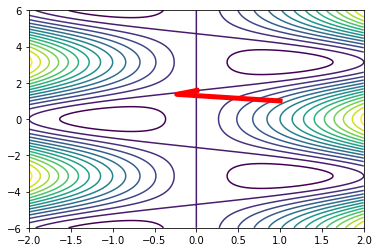

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    return(0.5 * x * x + x * np.cos(y))

xlist = np.linspace(-2.0,2.0,1000)
ylist = np.linspace(-6.0,6.0,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,15)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
plt.plot(xiter,yiter, linewidth=5, color='r')
plt.show()

Figure 10.1 (b), page 238

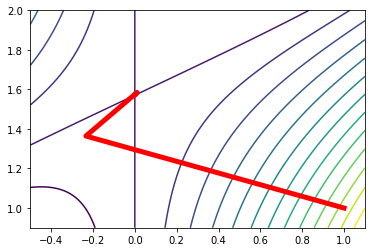

In [6]:
xlist = np.linspace(-0.5,1.1,1000)
ylist = np.linspace(0.9,2,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,15)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
xiter
plt.plot(xiter,yiter, linewidth=5, color='r')
plt.show()

### Algorithm 10.2: Newton's local method by quadratic modeling

In [7]:
# The package optimization contains all the functions presented earlier. In this case, we need the quadraticDirect and the conjugateGrsdient functions.
import optimization as opt
def newtonLocalQuadratic(obj,x0,eps,cg=False,maxiter=100):
    n = len(x0)
    xk = x0
    iters = list()
    (f,g,H) = obj(xk)
    iters.append([xk,f,g,H])
    k = 0
    while linalg.norm(g) > eps and k < maxiter:
        if cg:
            d = opt.conjugateGradient(H,g,np.zeros((n,1)))[0]
        else:
            d = opt.quadraticDirect(H,g)
        xk = xk + d
        (f,g,H) = obj(xk)
        iters.append([xk,f,g,H])
        k += 1
    return (xk,iters)

We test the algorithm on the Rosenbrock function. It is described in Section 11.6 of the book for two variables.  The implementation below involves $n$ variables: \\[f(x) = \sum_{i=1}^{n-1} f_i(x) = \sum_{i=1}^{n-1} 100 (x_{i+1}-x_i^2)^2 + (1-x_i)^2.\\]
The calculation of the derivatives is based on the partial derivatives of the functions $f_i$:
\\[
\begin{array}{rcl}
\partial f_i/\partial x_i&=& -400 x_i (x_{i+1}-x_i^2) - 2(1-x_i), \\\\
\partial f_i/\partial x_{i+1}&=& 200 (x_{i+1}-x_i^2), \\\\
\partial^2 f_i/\partial x^2_i  &=& -400 x_{i+1}+ 1200 x_i^2 + 2, \\\\
\partial^2 f_i/\partial x_i \partial x_{i+1}  &=& -400 x_i^2, \\\\
\partial^2 f_i/\partial x^2_{i+1}  &=& 200. 
\end{array}
\\]


In [8]:
def exRosenbrock(x,hessian=False):
    n = len(x)
    f = sum(100.0 * (x.item(i+1)-x.item(i)**2)**2 + (1.0-x.item(i))**2 for i in range(n-1))
    g = np.zeros((n,1))
    for i in range(n-1):
        g[[i],[0]] = g[[i],[0]] - 400 * x.item(i) * (x.item(i+1)-x.item(i)**2)  - 2 * (1-x.item(i))
        g[[i+1],[0]] = g[[i+1],[0]] + 200 * (x.item(i+1)-x.item(i)**2)
    if hessian:
        H = np.zeros((n,n))
        for i in range(n-1):
            H[[i],[i]] = H[[i],[i]] - 400 * x.item(i+1) + 1200 * x.item(i)**2 + 2
            H[[i+1],[i]] = H[[i+1],[i]] - 400 * x.item(i)
            H[[i],[i+1]] = H[[i],[i+1]] - 400 * x.item(i)
            H[[i+1],[i+1]] = H[[i+1],[i+1]] + 200
        return f,g,H
    else:
        return f,g

def exRosenbrockWithHessian(x):
    return exRosenbrock(x,True)

In [9]:
x0 = np.array([[-1.5],[2]])
(sol,iters) = newtonLocalQuadratic(exRosenbrockWithHessian,x0,1e-15)
print(sol)

[[1.]
 [1.]]


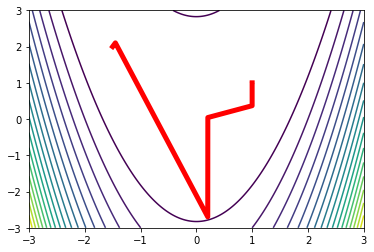

In [10]:
def theFunctionToPlot(x,y):
    return(100 * (y-x*x)**2+(1-x)**2)

xlist = np.linspace(-3.0,3.0,1000)
ylist = np.linspace(-3.0,3.0,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,20)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
xiter
plt.plot(xiter,yiter, linewidth=5, color='r')
plt.show()

We now apply the algorithm on example 5.8. In this case, the algorithm fails to converge, and one hessian is not positive definite. We try first using the direct method to solve the quadratic problem. An error is triggered. 

In [11]:
x0 = np.array([[1.1],[1.1]])
(sol,iters) = newtonLocalQuadratic(ex0508,x0,1e-15)
print(sol)

LinAlgError: 2-th leading minor of the array is not positive definite

If we try with the conjugate gradient method, an error is also triggered. 

In [12]:
x0 = np.array([[1.1],[1.1]])
(sol,iters) = newtonLocalQuadratic(ex0508,x0,1e-15,True)
print(sol)

ValueError: The matrix must be positive definite